# Hack The Feed: Insights From Social Media Data

This notebook presents the results of our analysis and visualization of the Playhouse Communications twitter dataset for the Dicey Tech hackathon. Each notebook is a standalone file that can be run from the top down to reproduce the findings of our analysis.

## Data loading and pre-processing

In [1]:
import pandas as pd
import numpy as np

file = "../data/twitter.csv"

df = pd.read_csv(file, low_memory=False)

df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y %I:%M %p")

df.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,...,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,2023-07-13 10:57:00,1679429829567946759,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429...,Your money should not be a gamble. Before you ...,https://twitter.com/StanbicIBTC/status/1679429...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,2023-07-12 20:03:00,1679204777081864192,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204...,"What skill (s) do you have, that no one ever t...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-07-12 19:00:00,1679189012798660608,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679189...,Sade was able to acquire a home loan and make ...,"https://bit.ly/StanbicIBTCHomeLoans, https://t...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekly Wealth Posts
3,2023-07-12 18:20:00,1679179017084354560,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679179...,Here are some mistakes you shouldn’t make duri...,https://twitter.com/StanbicIBTC/status/1679179...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-07-11 12:50:00,1678733396992745472,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1678733...,Safeguard every aspect of your operations with...,https://twitter.com/StanbicIBTC/status/1678733...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Insurance Limited Posts, Weekly Wealth Posts"


In [2]:
%cd ..

/Users/mac/Documents/development/Hack_the_feed


In [3]:
# import function to pre-process the dataset
from src.clean_data import clean_df

new_df = clean_df(df)
new_df.index = pd.to_datetime(new_df.index)

new_df.head()

,Content Type,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,...,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,bit.ly Link Clicks,Video Views,Media Views,Tags,Time,Time Period
Date,,,,,,,,,,,,,,,,,,,,,
2013-02-17,Photo,,https://twitter.com/StanbicIBTC/status/3030515...,We are proud to be sponsors of the BIT hub at ...,NaN,NaN,NaN,166372.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09:01:00,morning
2013-02-18,Text,,https://twitter.com/StanbicIBTC/status/3035920...,1st Bank CEO: You need imbibe the culture of s...,NaN,NaN,NaN,166372.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20:49:00,evening
2013-02-18,Text,,https://twitter.com/StanbicIBTC/status/3035901...,Modupe Ladipo of EFiNa: 2012 research - only 3...,NaN,NaN,NaN,166372.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20:41:00,evening
2013-02-18,Text,,https://twitter.com/StanbicIBTC/status/3035789...,FCMB CEO at Stanbic IBTC sponsored hub: We've ...,NaN,NaN,NaN,166372.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19:57:00,evening
2013-02-18,Photo,,https://twitter.com/StanbicIBTC/status/3034139...,'@SMWLagos starts today. We're proud sponsors ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09:01:00,morning


## Analysis and Visualization


###  Impressions and Reach
The following sub-sections provide insights on the `Impressions` and `Reach` of the twitter posts.

#### QUESTION: What type of content generates the most impressions?

In [4]:
# create a slice of the dataframe containing non-zero values for the `Impression` column.
valid_impressions = new_df[(new_df["Impressions"] != 0) & ~new_df["Impressions"].isna()]

# group by `Content Type` and calculate the mean `Impressions for each content type
content_df = (
    valid_impressions.groupby("Content Type")["Impressions"]
    .mean()
    .reset_index()
    .sort_values("Impressions", ascending=False)
)

content_df

,Content Type,Impressions
1,Photo,3377.399724
3,Video,2982.329670
2,Text,2609.051487
0,Link,1997.767908


In [5]:
# import necessary plotting libraries
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [6]:
# create a bar chart showing the average impressions by content type
from bokeh.plotting import figure, show

x_range = content_df["Content Type"]
y_range = content_df["Impressions"]

p = figure(
    title="Average Impressions by Content Type",
    x_range=x_range,
    height=400,
    width=600,
    y_axis_label="Average Impression",
)

p.vbar(x=x_range, top=y_range, width=0.8)

p.yaxis.minor_tick_out = 0
p.y_range.start = 1000

show(p)

#### QUESTION: What is the trend of impressions over the years?

In [7]:
# import relevant plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

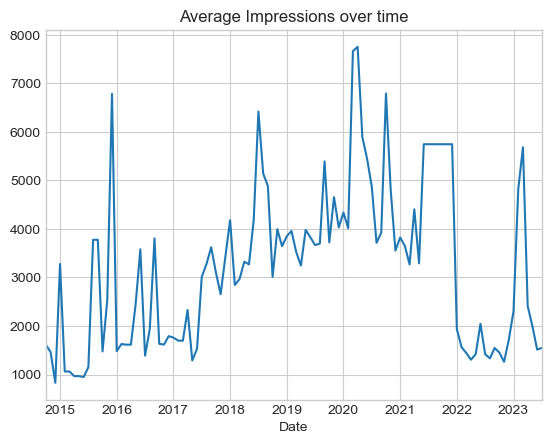

In [8]:
# calculate the mean impressions per month
mmi = valid_impressions["Impressions"].resample("M").mean()

# forward fill the data for months with empty values and generate a line plot
ax = mmi.fillna(method="ffill").plot(title="Average Impressions over time")

plt.savefig("docs/twitter_avg_impression_per_time.png")
plt.show();

#### QUESTION: When is the best time to post on Twitter?

In [9]:
# group the dataframe by content type and time period the post was made
cbt = (
    valid_impressions.groupby(["Content Type", "Time Period"])["Potential Reach"]
    .mean()
    .reset_index()
)

time_period_order = ["morning", "afternoon", "evening"]

# arrange the time period in order of morning, afternoon, and evening.
cbt["Time Period"] = pd.Categorical(
    cbt["Time Period"], categories=time_period_order, ordered=True
)

# sort the grouped dataframe by time period order
cbt = cbt.sort_values(["Content Type", "Time Period"])
cbt.reset_index(drop=True, inplace=True)

In [10]:
# slice the grouped dataframe into content types
link = cbt.iloc[:3]
link.name = "Links"

photo = cbt.iloc[3:6]
photo.name = "Photos"

text = cbt.iloc[6:9]
text.name = "Texts"

video = cbt.iloc[9:]
video.name = "Videos"

content = (link, photo, text, video)

In [11]:
# create a function that plots a Bokeh bar chart for the time period data.

from bokeh.models import NumeralTickFormatter as NTF


def plot_bar(df):
    p = figure(title=df.name, x_range=list(df["Time Period"]), height=300, width=400)

    p.vbar(x="Time Period", top="Potential Reach", source=df, width=0.8)

    p.axis.major_tick_out = 0

    p.xgrid.grid_line_color = None

    p.yaxis.formatter = NTF(format="0,0")
    p.yaxis.axis_label = "Average Potential Reach"
    p.yaxis.minor_tick_out = 0
    p.y_range.start = 100000
    p.y_range.end = 500000

    return p

In [12]:
# import the gridplot function to display the plots in a gridplot
from bokeh.layouts import gridplot

# create an empty list and append the bar plots in list
plots = []
for c in content:
    plot = plot_bar(c)
    plots.append(plot)

# create a 2x2 layout for the plots and display it
layout = gridplot(plots, ncols=2, toolbar_location=None)
show(layout)

#### QUESTION: How often do users click on shared links?

In [13]:
# slice the `valid_impressions` dataframe to include only the rows with values for `Linked Content` and `Click-Through Rate`
linked = valid_impressions[
    (~valid_impressions["Linked Content"].isna())
    & (~valid_impressions["Click-Through Rate"].isna())
]

# convert the `Click-Through Rate` column to float values (decimal numbers)
linked.loc[:, "Click-Through Rate"] = linked["Click-Through Rate"].apply(
    lambda x: float(x.replace(",", "").replace("%", ""))
)

# group the `linked` dataframe by `Content Type` and calculate the mean `Click-Through Rate(ctr)`
ctr = (
    linked.groupby("Content Type")["Click-Through Rate"]
    .mean()
    .reset_index()
    .sort_values("Click-Through Rate", ascending=False)
)

In [14]:
# plot a bar chart to show the ctr for each content type
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

# Convert the DataFrame to a ColumnDataSource
source = ColumnDataSource(ctr)

# Create a Bokeh figure
p = figure(
    title="Click-through rate for each content type",
    x_range=ctr["Content Type"],
    y_axis_label="Click through rate",
)

p.vbar(x="Content Type", top="Click-Through Rate", source=source, width=0.8)

p.y_range.start = 0

show(p)